# Vibe Graph

## 필요 라이브러리 로드

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [274]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [275]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [276]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [277]:
site_name = 'vibe'

In [278]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [279]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [280]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/mod_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [281]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_vibe_20220405.xlsx
1 live_vibe_20220406.xlsx
2 live_vibe_20220407.xlsx
3 live_vibe_20220412.xlsx
4 live_vibe_20220413.xlsx
5 live_vibe_20220413_154819.xlsx
6 live_vibe_20220414_134945.xlsx
7 live_vibe_20220415_180611.xlsx
8 live_vibe_20220418_111004.xlsx
9 live_vibe_20220419_110642.xlsx
10 live_vibe_20220420_110627.xlsx
11 live_vibe_20220421_110704.xlsx
12 live_vibe_20220422_110647.xlsx
13 live_vibe_20220425_110704.xlsx
14 live_vibe_20220426_110637.xlsx
15 live_vibe_20220427_110635.xlsx
16 live_vibe_20220428_110605.xlsx
17 live_vibe_20220429_110625.xlsx
18 live_vibe_20220430_110605.xlsx
19 live_vibe_20220501_110605.xlsx
20 live_vibe_20220502_110605.xlsx
21 live_vibe_20220503_110605.xlsx
22 live_vibe_20220504_110605.xlsx
23 live_vibe_20220505_110605.xlsx
24 live_vibe_20220506_110605.xlsx
25 live_vibe_20220507_110630.xlsx
26 live_vibe_20220508_110605.xlsx
27 live_vibe_20220509_110605.xlsx


## 수집한 파일 모두 합치기

In [282]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

사이트                   날짜  순위                     곡                 가수  \
0  vibe  2022-04-05 00:00:00   1                TOMBOY           (여자) 아이들   
1  vibe  2022-04-05 00:00:00   2        Feel My Rhythm  Red Velvet (레드벨벳)   
2  vibe  2022-04-05 00:00:00   3  GANADARA (Feat. 아이유)                박재범   
3  vibe  2022-04-05 00:00:00   4                  INVU       태연 (TAEYEON)   
4  vibe  2022-04-05 00:00:00   5                 RUN2U        STAYC(스테이씨)   

                                          앨범          소속사 소속사_분류  
0                                I NEVER DIE         CUBE     기타  
1  'The ReVe Festival 2022 - Feel My Rhythm'           SM     SM  
2                                   GANADARA  MORE VISION     기타  
3                       INVU - The 3rd Album           SM     SM  
4                              YOUNG-LUV.COM      HIGH UP     기타

In [283]:
df['날짜'] = df['날짜'].astype(str)

In [284]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

사이트          날짜  순위                     곡                 가수  \
0  vibe  2022-05-02   1             LOVE DIVE           IVE(아이브)   
1  vibe  2022-05-02   2  봄여름가을겨울 (Still Life)       BIGBANG (빅뱅)   
2  vibe  2022-05-02   3                TOMBOY           (여자) 아이들   
3  vibe  2022-05-02   4        Feel My Rhythm  Red Velvet (레드벨벳)   
4  vibe  2022-05-02   5                사랑인가 봐    멜로망스(Melomance)   

                                          앨범   소속사 소속사_분류  
0                                  LOVE DIVE   스타쉽    스타쉽  
1                       봄여름가을겨울 (Still Life)    YG     YG  
2                                I NEVER DIE  CUBE     기타  
3  'The ReVe Festival 2022 - Feel My Rhythm'    SM     SM  
4                   사랑인가 봐 (사내맞선 OST 스페셜 트랙)   NaN    NaN

In [285]:
sliced_df.tail()

사이트          날짜   순위               곡                 가수  \
702  vibe  2022-05-08   97        BOP BOP!         VIVIZ(비비지)   
703  vibe  2022-05-08   97        BOP BOP!         VIVIZ(비비지)   
704  vibe  2022-05-08   98  사랑을 사랑하게 될 때까지            잔나비 최정훈   
705  vibe  2022-05-08   99        Queendom  Red Velvet (레드벨벳)   
706  vibe  2022-05-08  100        With you                 지민   

                                     앨범      소속사 소속사_분류  
702  The 1st Mini Album 'Beam Of Prism'  빅플래닛메이드     기타  
703  The 1st Mini Album 'Beam Of Prism'       스윙     스윙  
704                      사랑을 사랑하게 될 때까지   페포니 뮤직     기타  
705       Queendom - The 6th Mini Album       SM     SM  
706                 우리들의 블루스 OST Part 4      빅히트    빅히트

In [286]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     707 non-null    object
 1   날짜      707 non-null    object
 2   순위      707 non-null    int64 
 3   곡       707 non-null    object
 4   가수      707 non-null    object
 5   앨범      707 non-null    object
 6   소속사     693 non-null    object
 7   소속사_분류  693 non-null    object
dtypes: int64(1), object(7)
memory usage: 44.3+ KB


### 수집한 곡의 유니크

In [287]:
len(sliced_df['곡'].unique())

106

In [288]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

날짜
0  2022-05-02
1  2022-05-03
2  2022-05-04
3  2022-05-05
4  2022-05-06
5  2022-05-07
6  2022-05-08

### 제목과 가수 매칭 값 추출

In [289]:
sort_df = sliced_df[['곡', '가수']]
sort_df

곡                 가수
0               LOVE DIVE           IVE(아이브)
1    봄여름가을겨울 (Still Life)       BIGBANG (빅뱅)
2                  TOMBOY           (여자) 아이들
3          Feel My Rhythm  Red Velvet (레드벨벳)
4                  사랑인가 봐    멜로망스(Melomance)
..                    ...                ...
702              BOP BOP!         VIVIZ(비비지)
703              BOP BOP!         VIVIZ(비비지)
704        사랑을 사랑하게 될 때까지            잔나비 최정훈
705              Queendom  Red Velvet (레드벨벳)
706              With you                 지민

[707 rows x 2 columns]

In [290]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

곡                 가수
0               LOVE DIVE           IVE(아이브)
1    봄여름가을겨울 (Still Life)       BIGBANG (빅뱅)
2                  TOMBOY           (여자) 아이들
3          Feel My Rhythm  Red Velvet (레드벨벳)
4                  사랑인가 봐    멜로망스(Melomance)
..                    ...                ...
101           다시 만날 수 있을까                임영웅
102               봄 to 러브               10CM
103      감동이야 (feat. 성시경)           싸이 (PSY)
104        이제는 (feat. 화사)           싸이 (PSY)
105        사랑을 사랑하게 될 때까지            잔나비 최정훈

[106 rows x 2 columns]

### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [291]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [292]:
len(song_df_list)

106

## 그래프 테스트

### 노래 선택

In [293]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   사이트     7 non-null      object
 2   순위      7 non-null      int64 
 3   곡       7 non-null      object
 4   가수      7 non-null      object
 5   앨범      7 non-null      object
 6   소속사     7 non-null      object
 7   소속사_분류  7 non-null      object
 8   순위변동    7 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 560.0+ bytes


In [294]:
tmp = song_df_list[100]
tmp

날짜   사이트    순위         곡                  가수        앨범  \
0  2022-05-02   NaN   NaN  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
1  2022-05-03   NaN   NaN  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
2  2022-05-04  vibe  60.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
3  2022-05-05  vibe  46.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
4  2022-05-06  vibe  42.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
5  2022-05-07  vibe  38.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
6  2022-05-08  vibe  36.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   

            소속사 소속사_분류  순위변동  
0           NaN    NaN   NaN  
1           NaN    NaN   NaN  
2  SOURCE MUSIC     기타   0.0  
3  SOURCE MUSIC     기타  14.0  
4  SOURCE MUSIC     기타   4.0  
5  SOURCE MUSIC     기타   4.0  
6  SOURCE MUSIC     기타   2.0

In [295]:
tmp['곡'].value_counts().index.values[0]

'FEARLESS'

In [296]:
tmp['가수'].value_counts().index.values[0]

'LE SSERAFIM (르세라핌)'

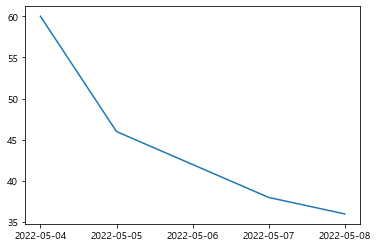

In [297]:
plt.plot(tmp['날짜'], tmp['순위'])

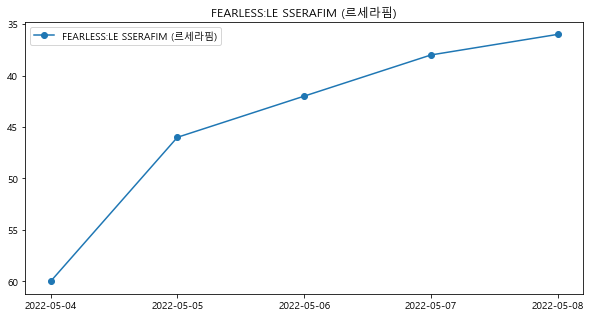

In [298]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [299]:
temp_df = song_df_list[70:91]

### 그래프

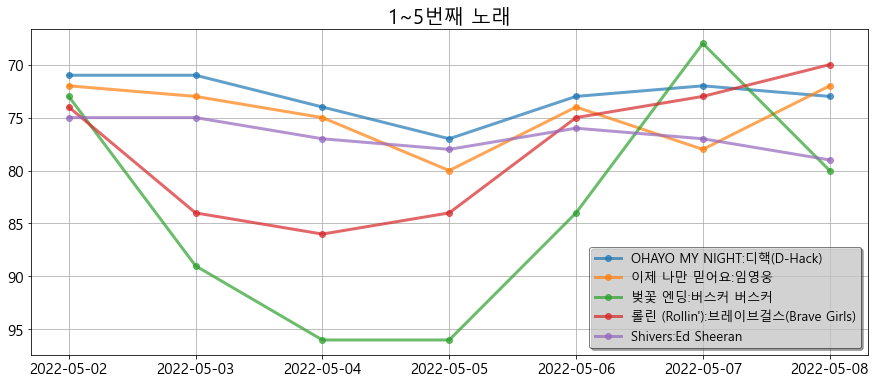

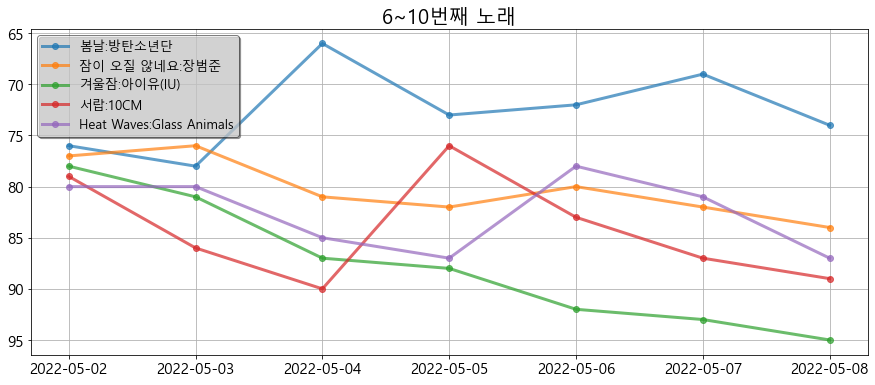

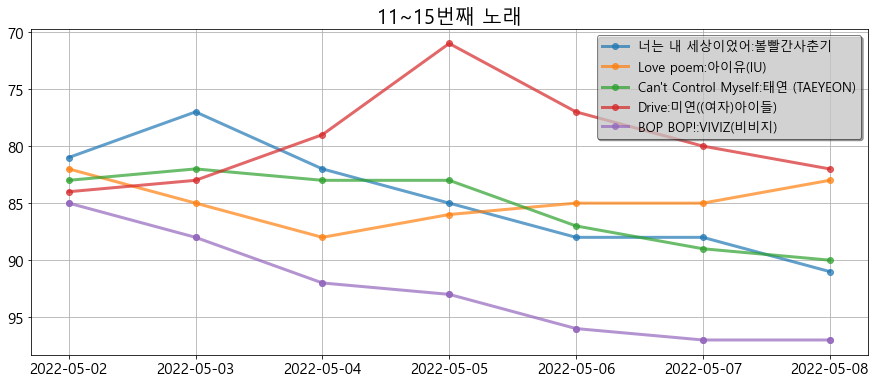

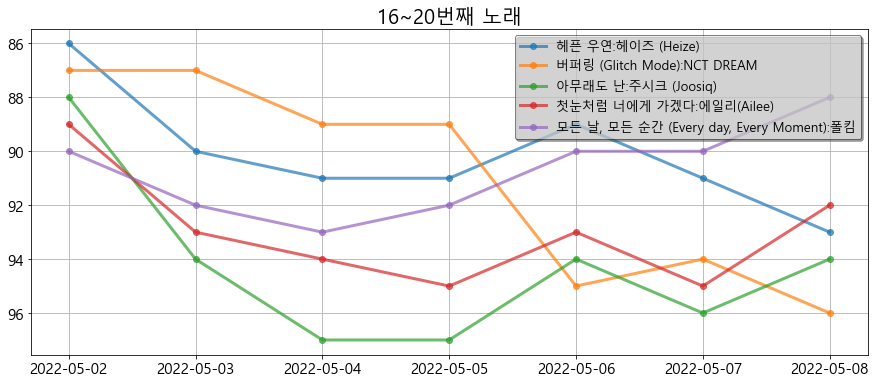

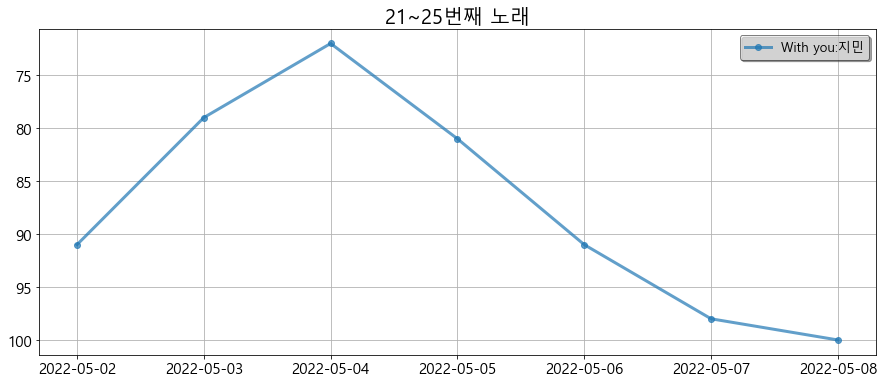

In [300]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [301]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

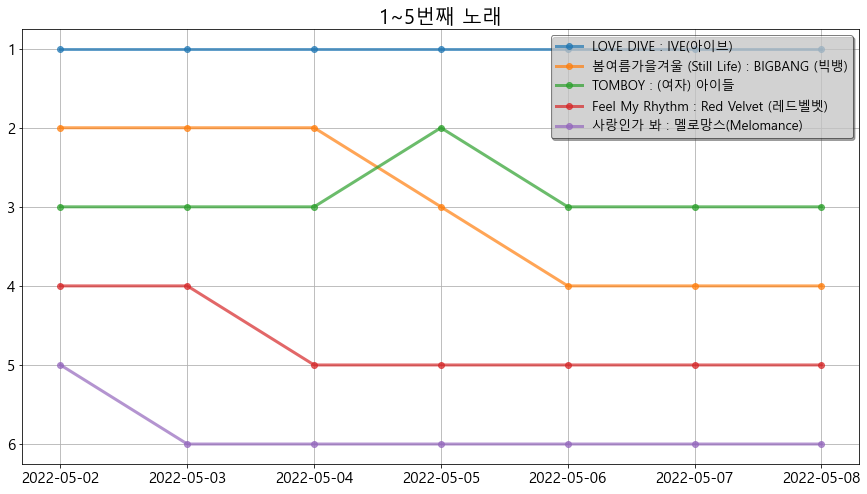

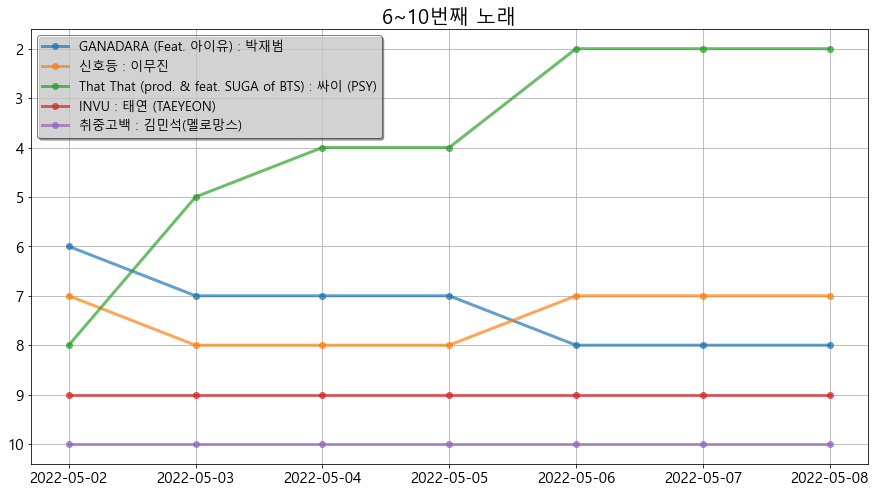

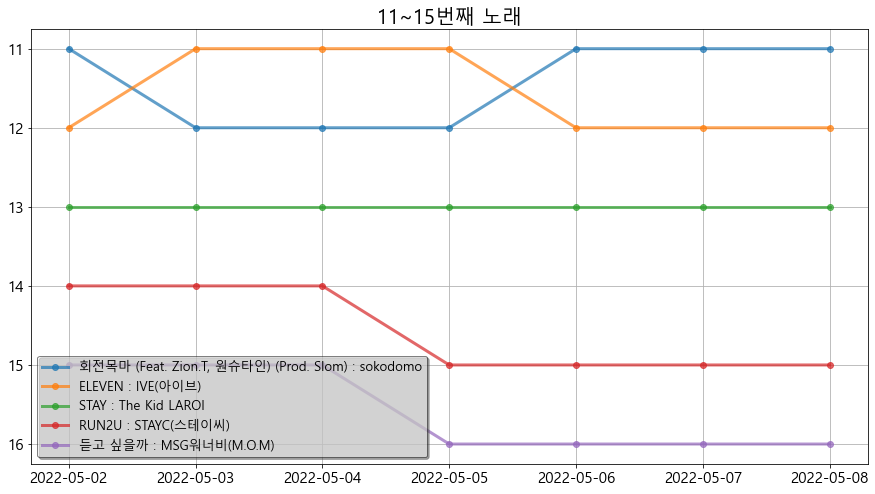

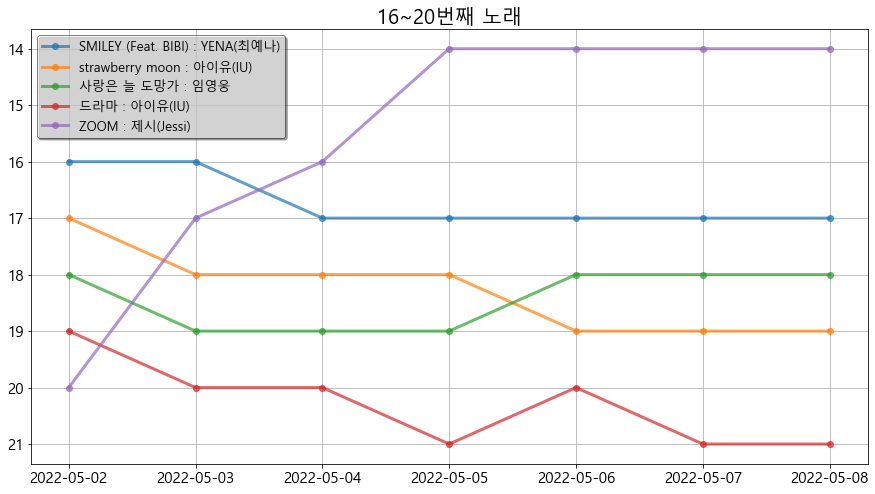

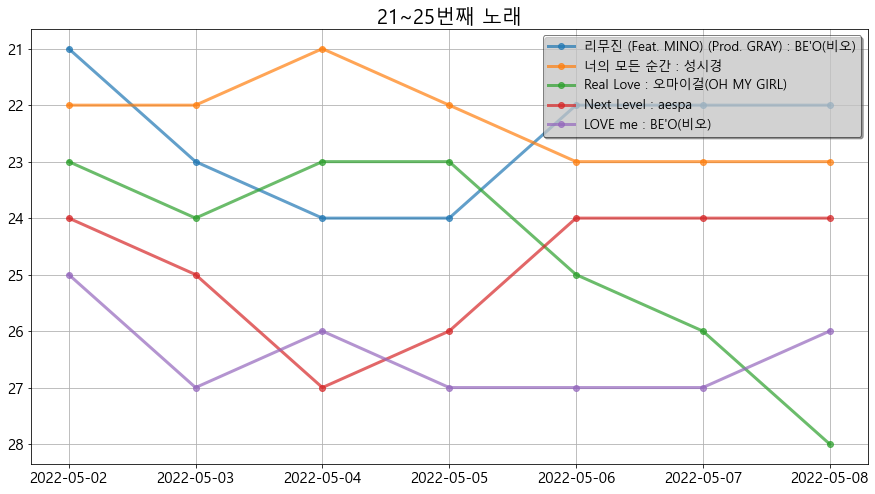

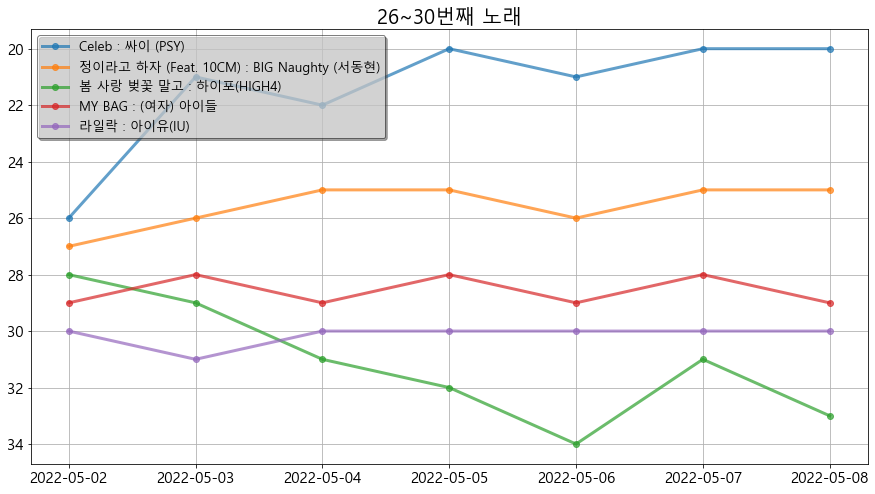

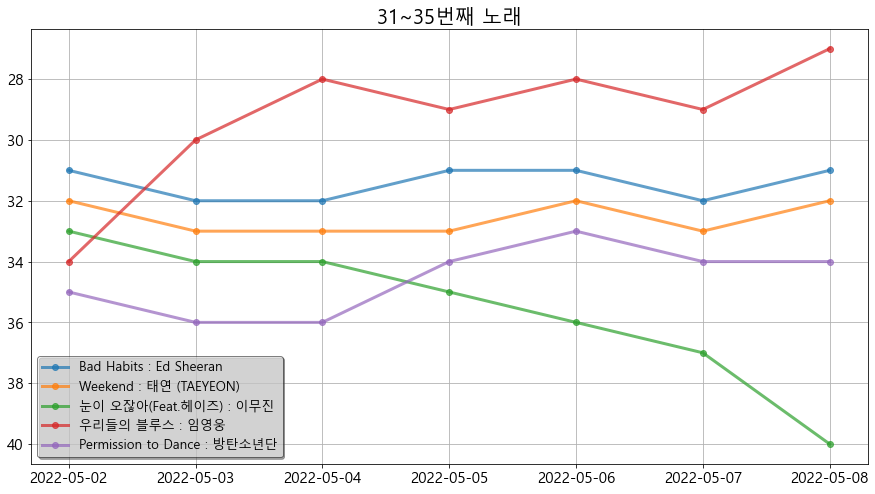

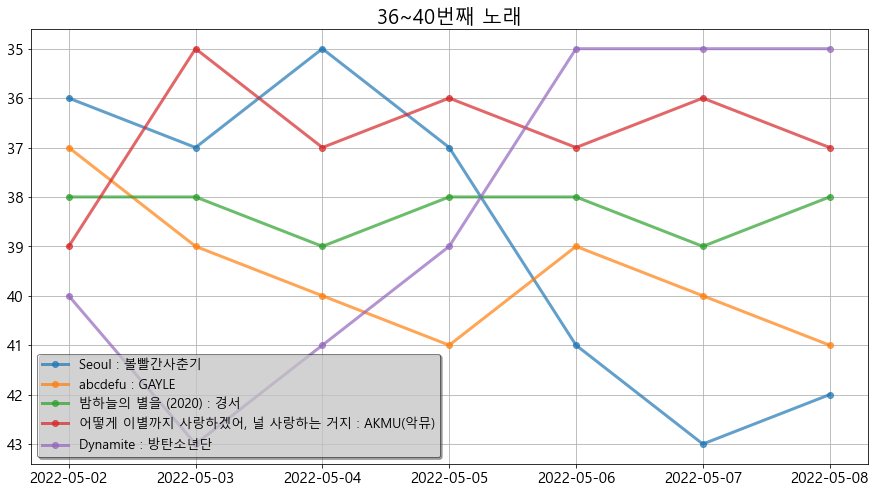

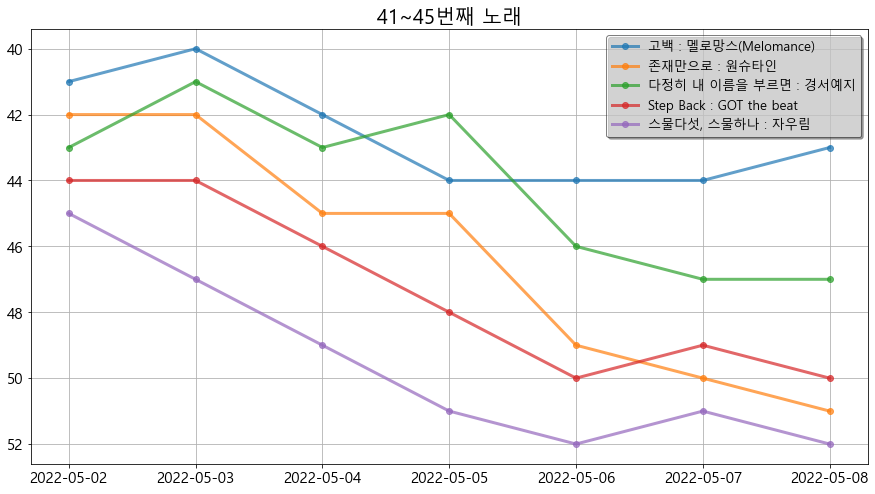

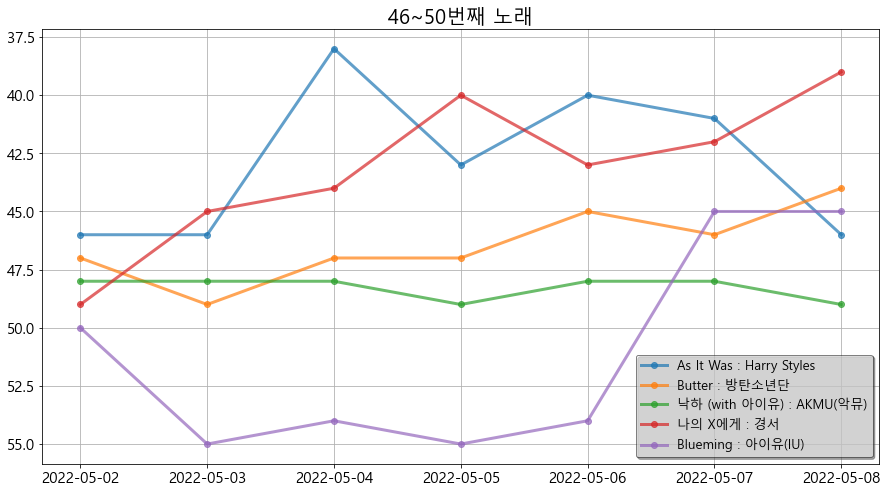

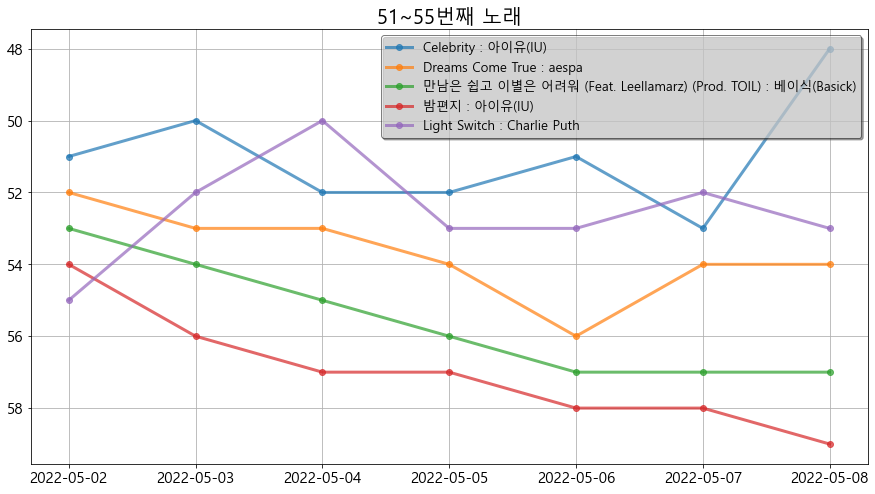

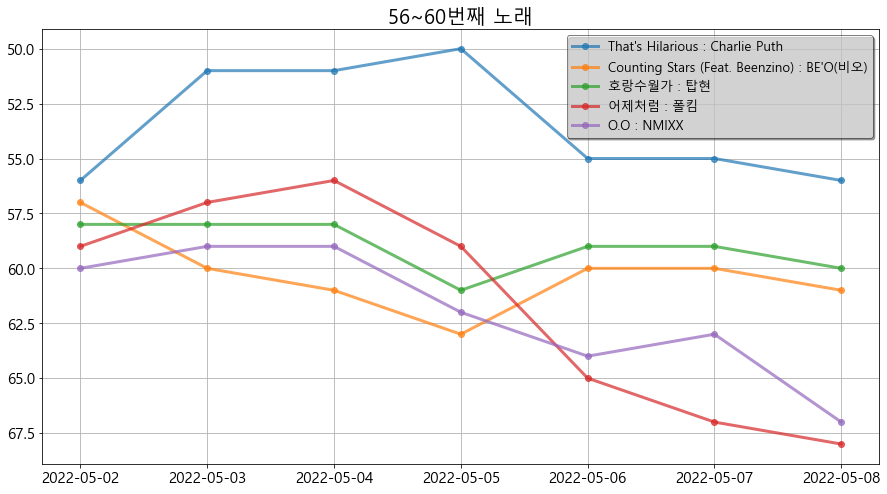

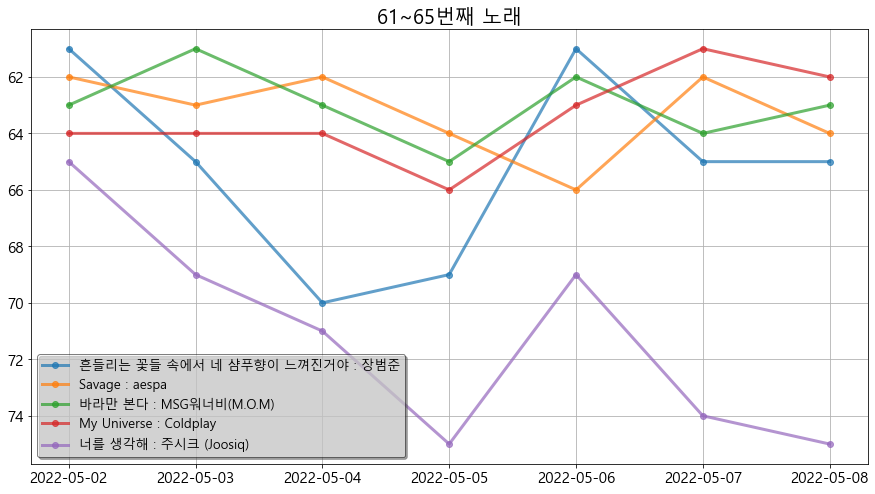

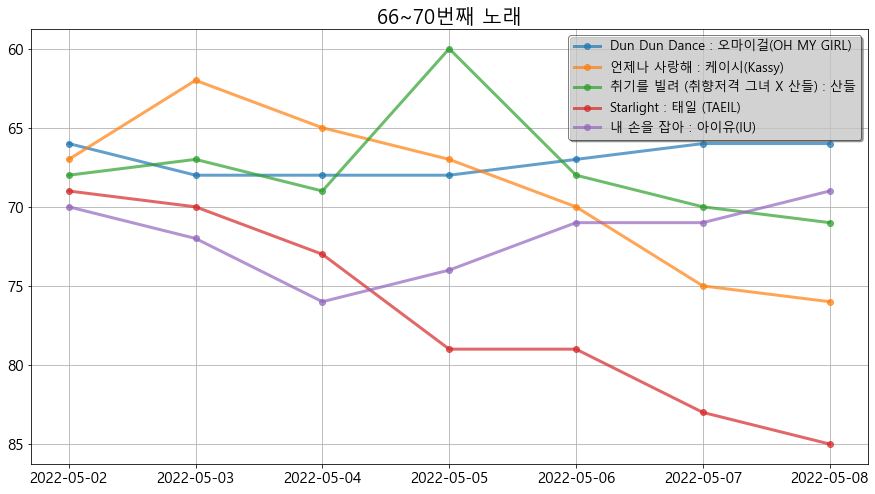

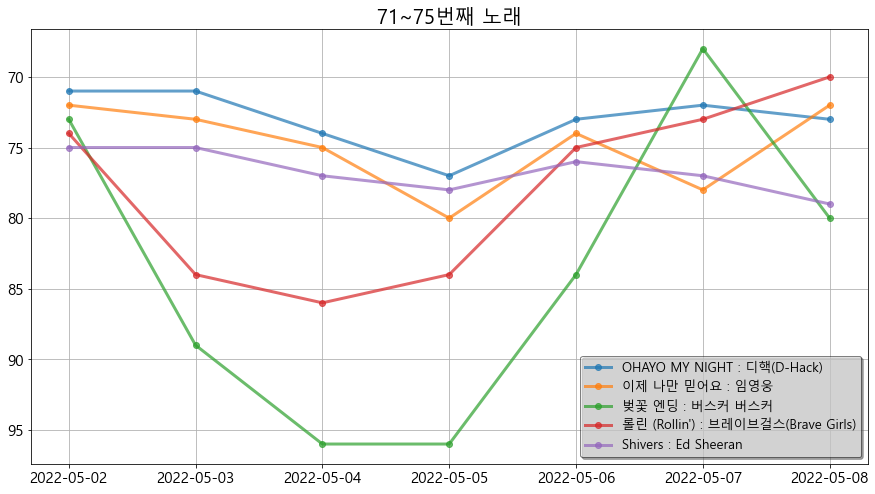

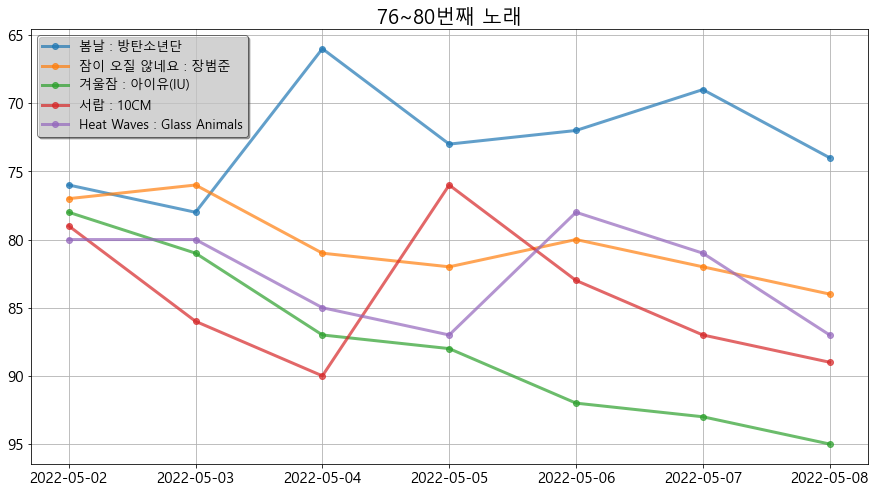

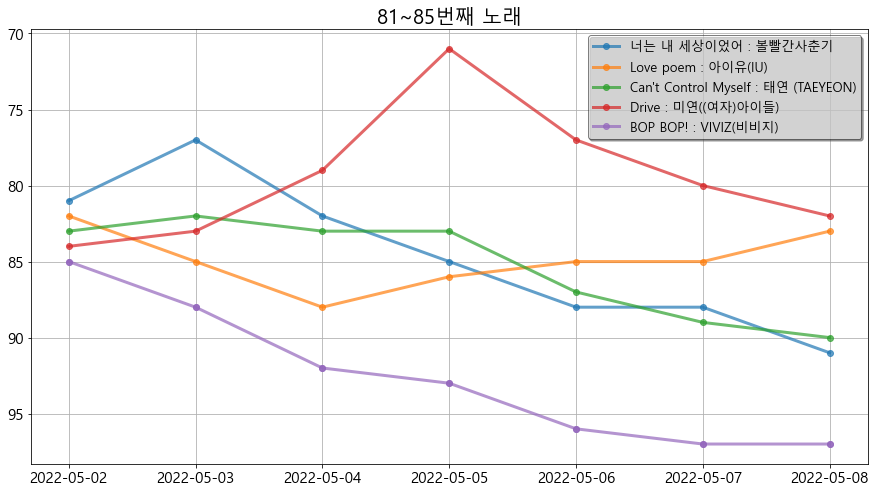

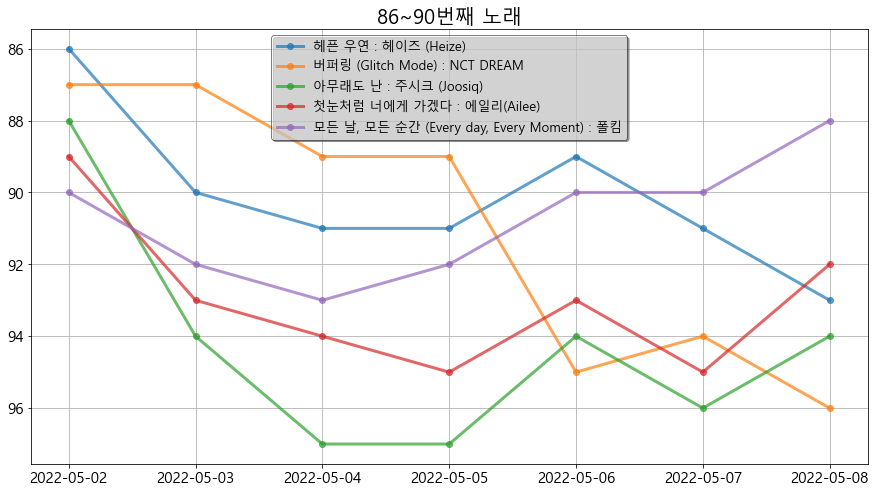

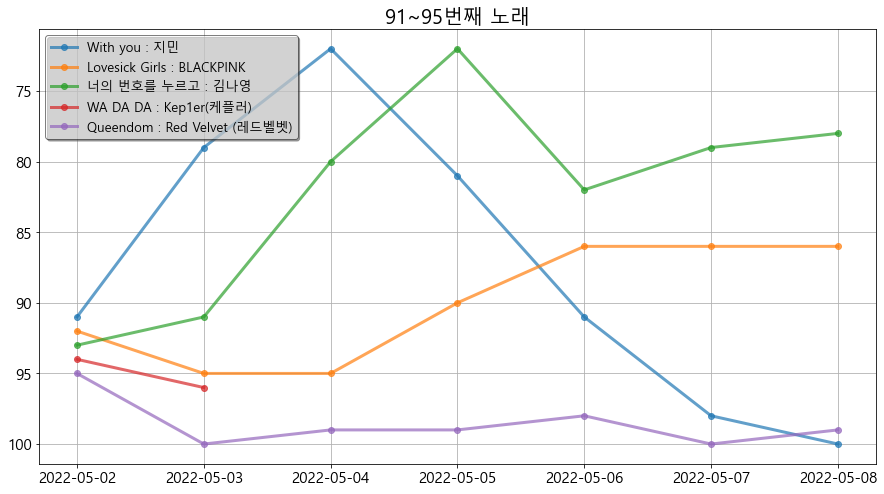

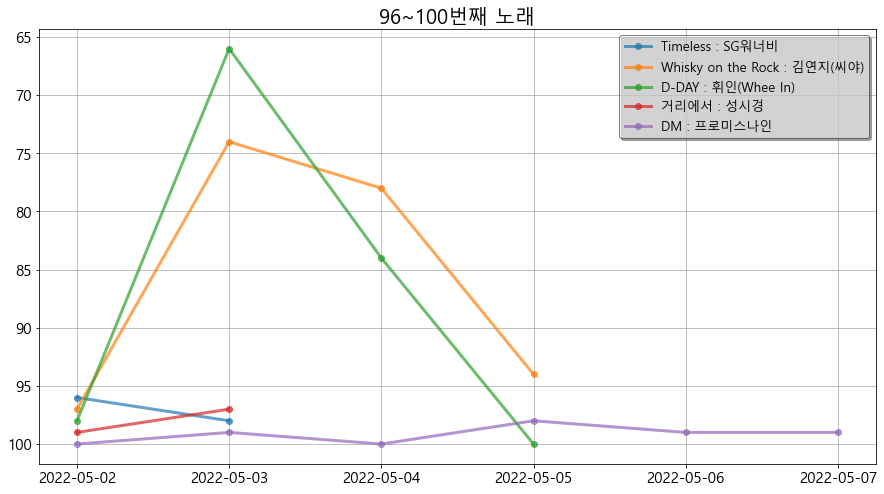

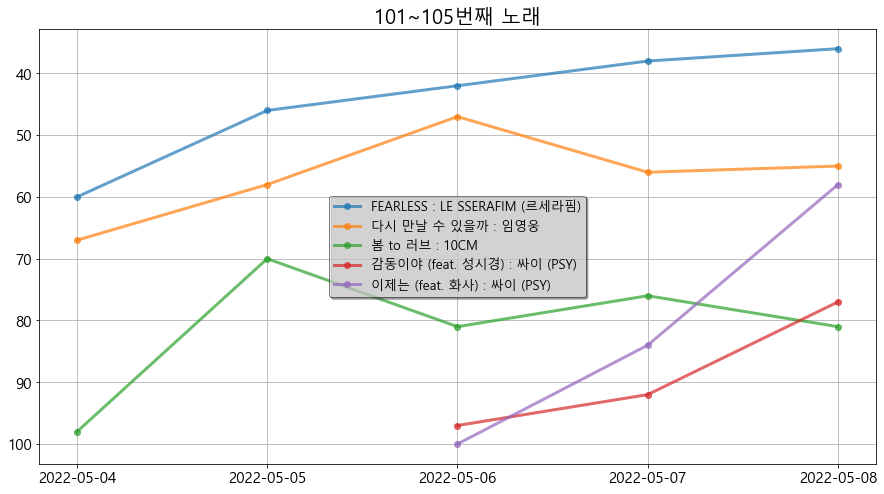

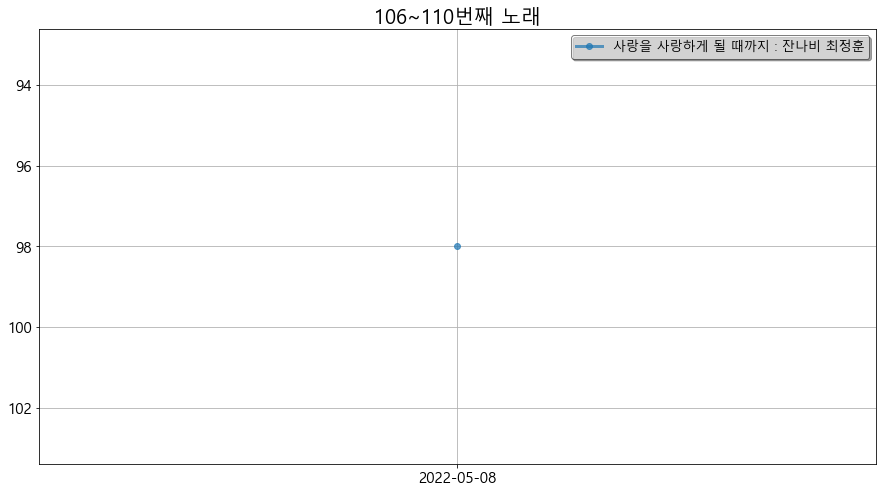

In [302]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [303]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

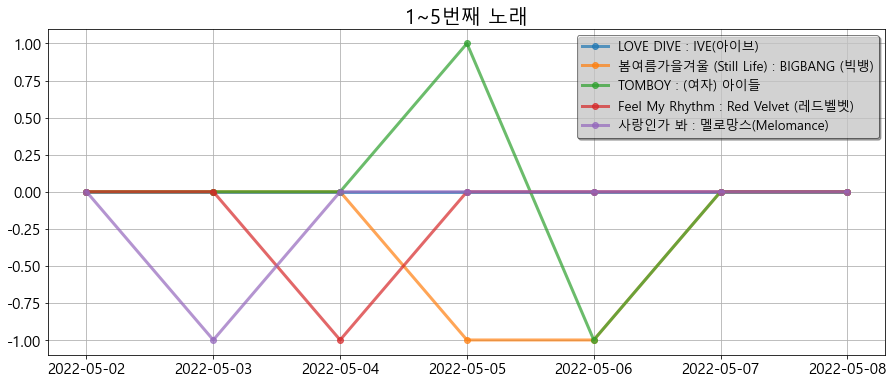

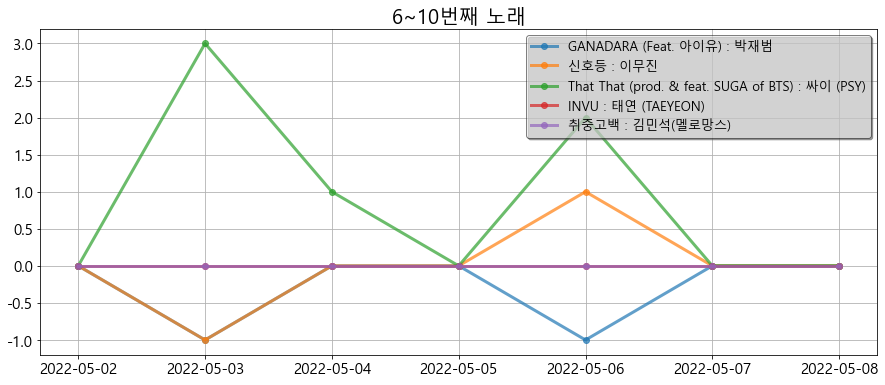

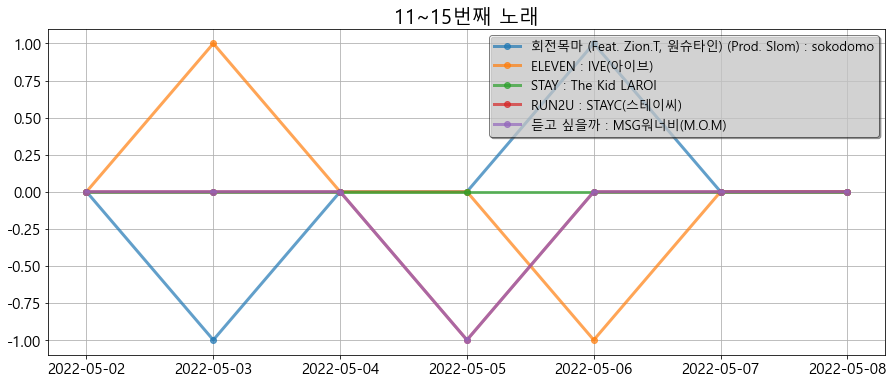

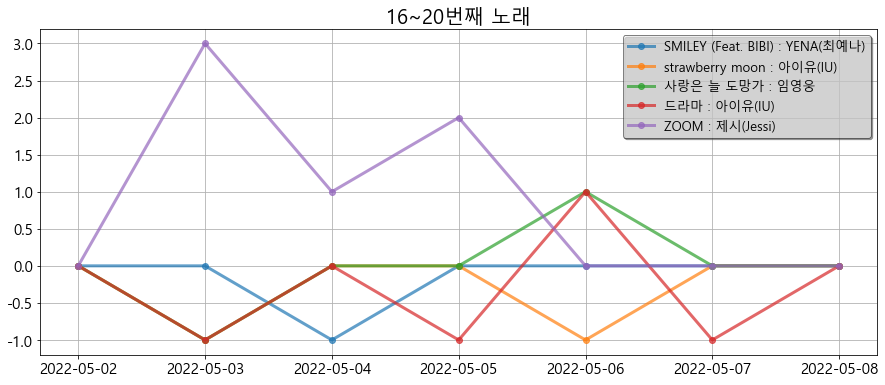

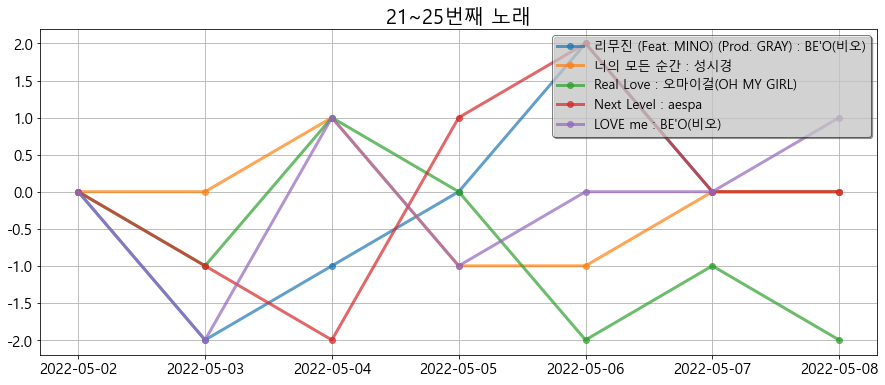

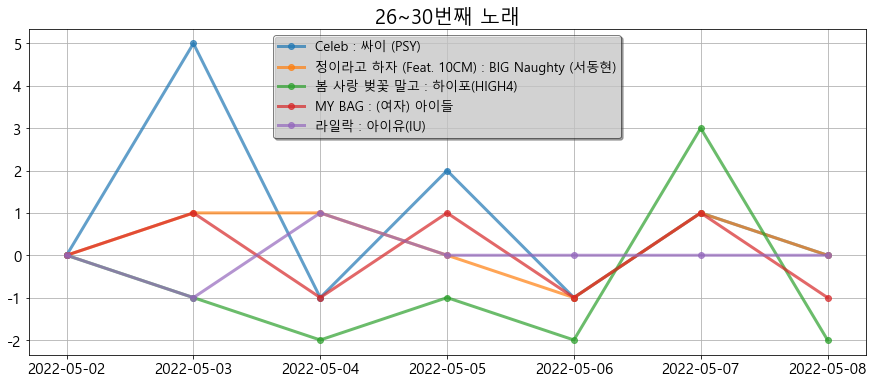

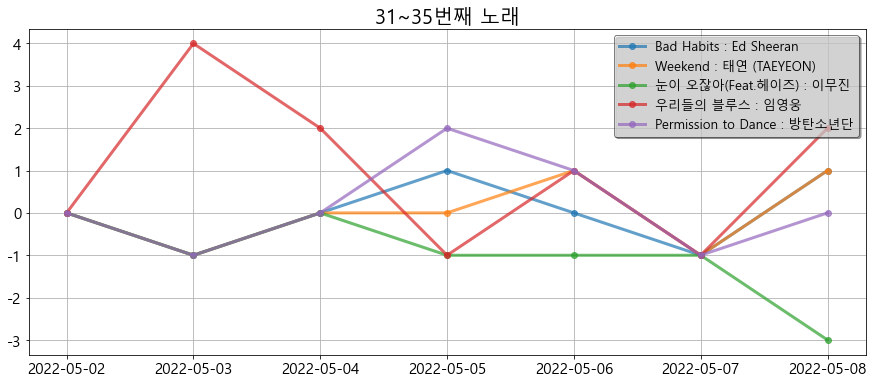

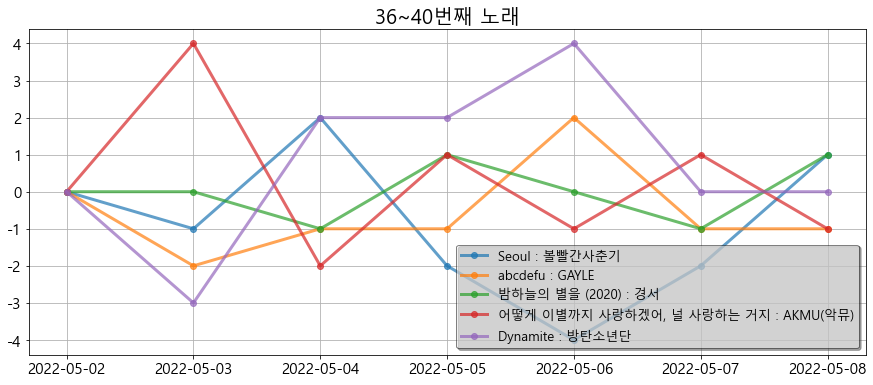

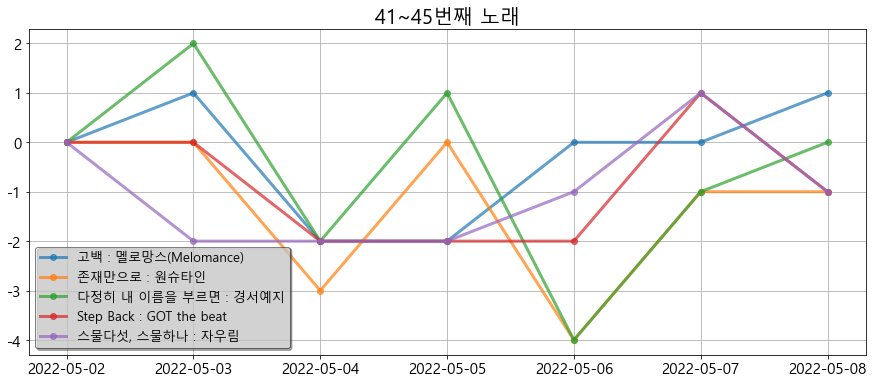

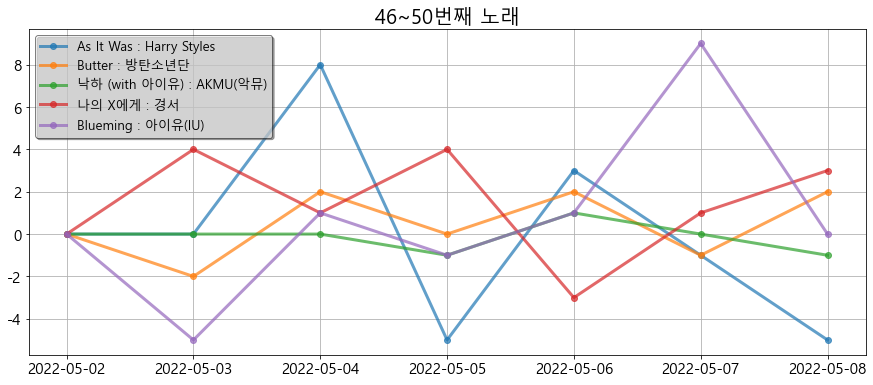

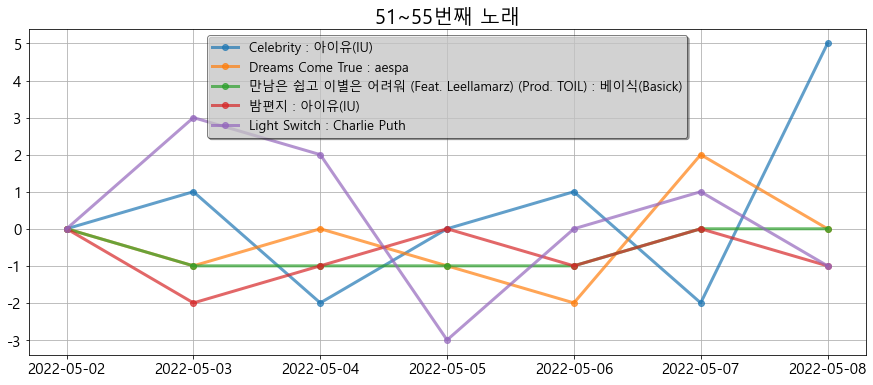

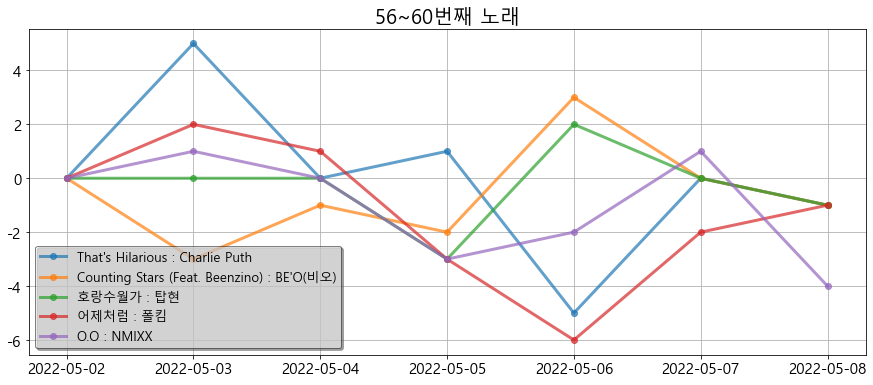

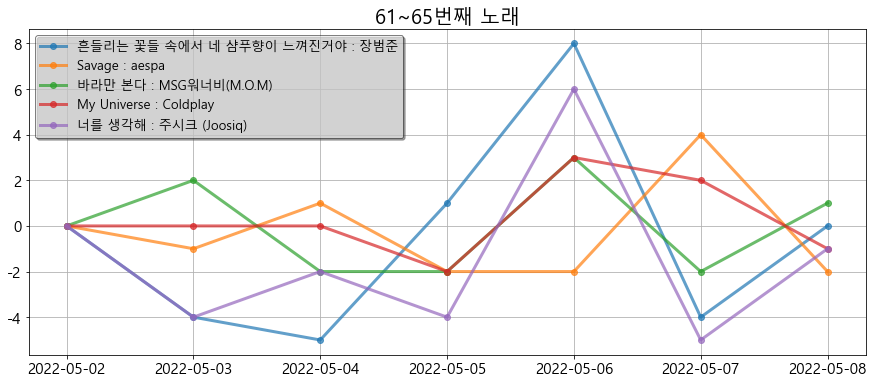

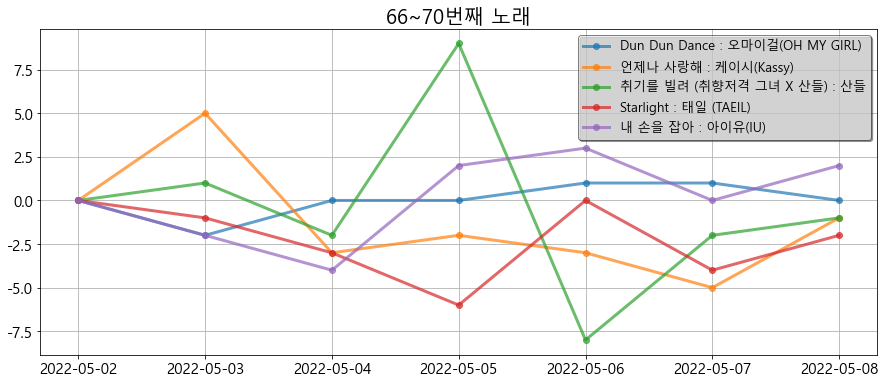

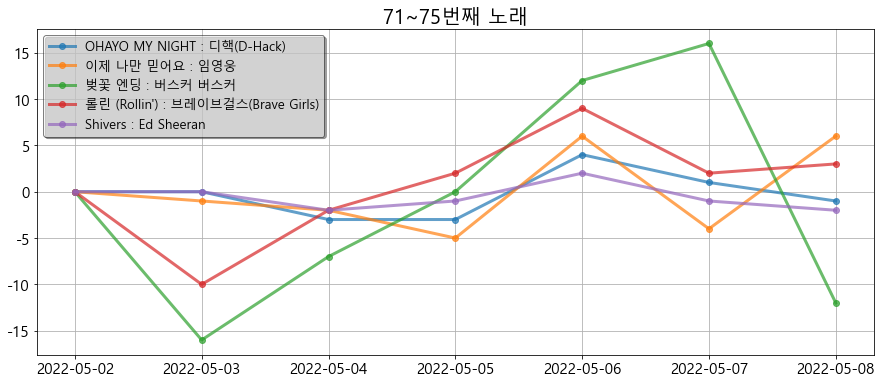

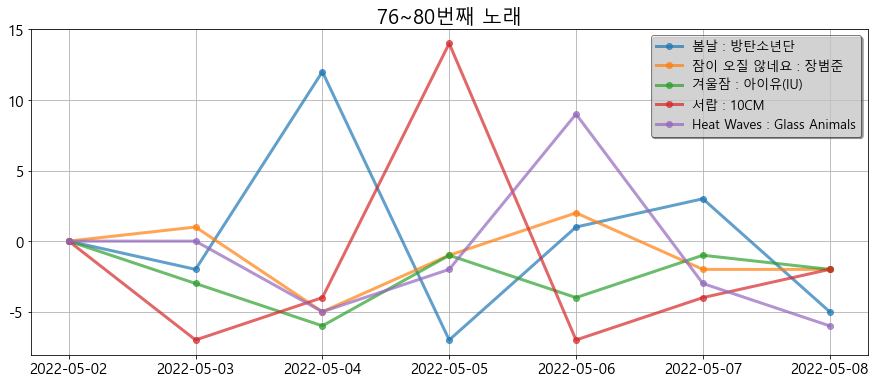

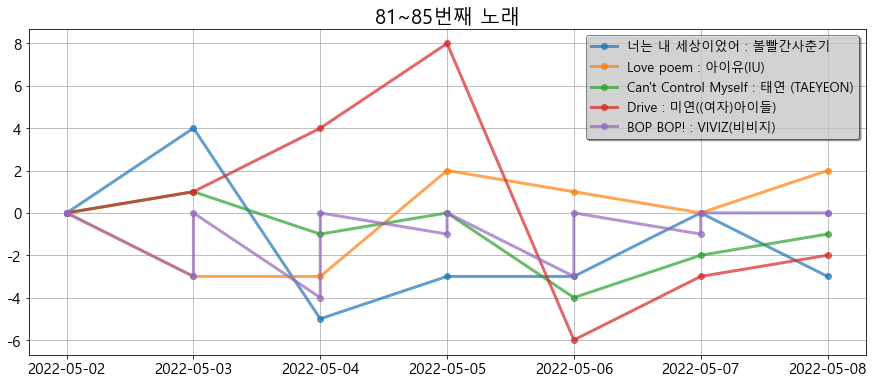

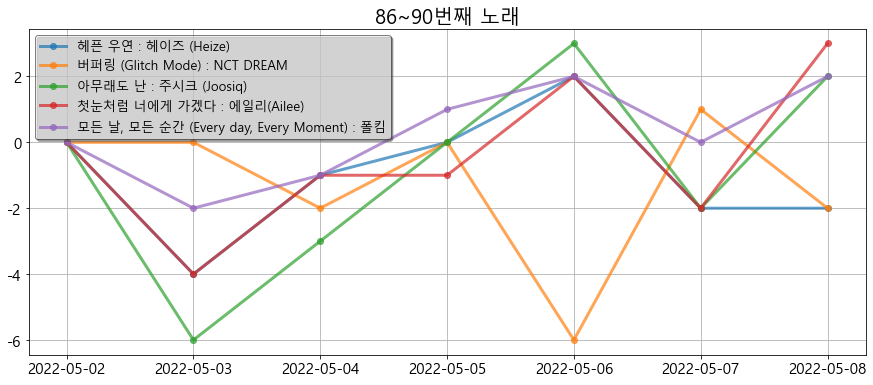

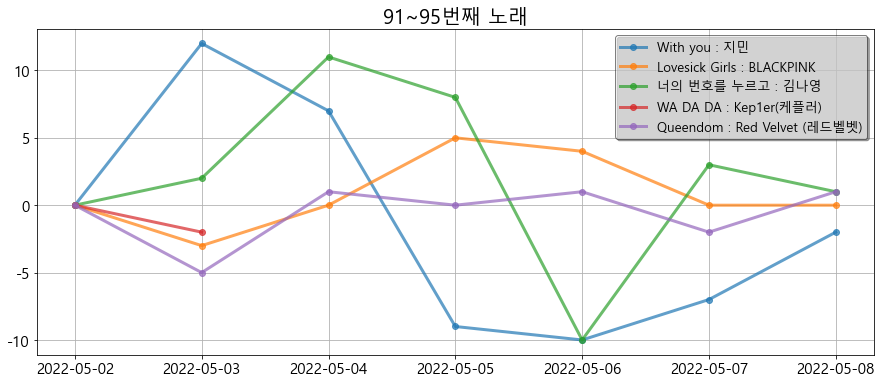

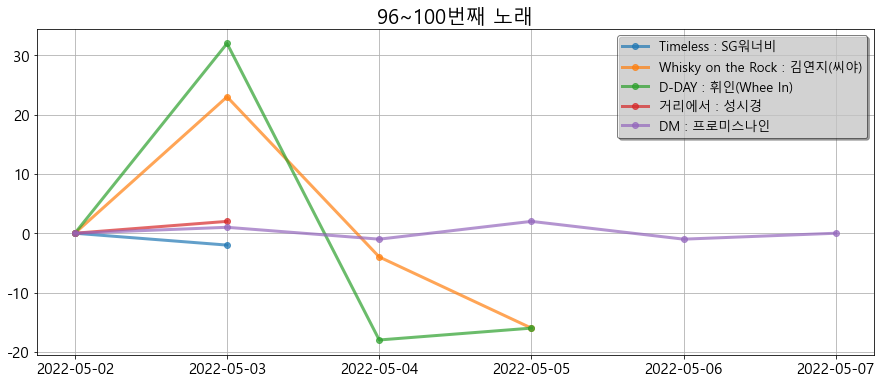

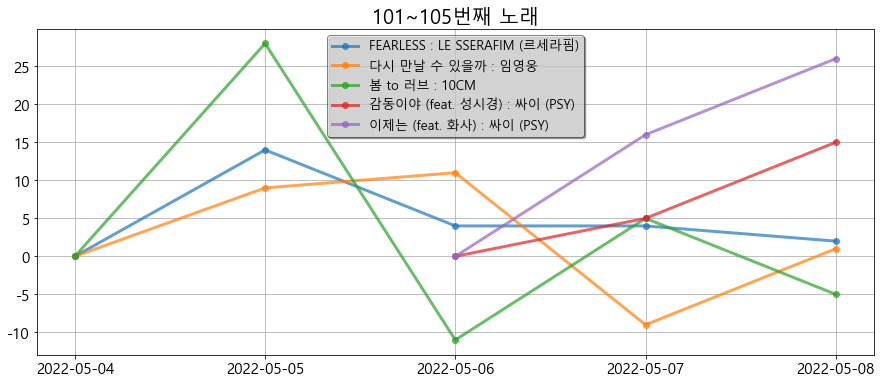

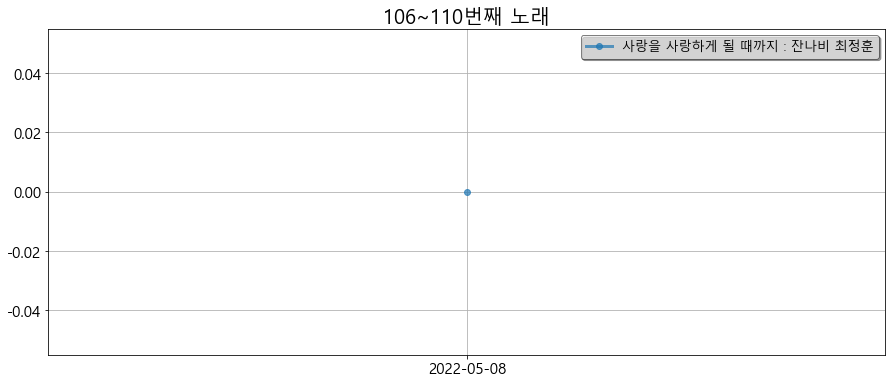

In [304]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [305]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [306]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      749 non-null    object 
 1   사이트     707 non-null    object 
 2   순위      707 non-null    float64
 3   곡       749 non-null    object 
 4   가수      749 non-null    object 
 5   앨범      749 non-null    object 
 6   소속사     693 non-null    object 
 7   소속사_분류  693 non-null    object 
 8   순위변동    707 non-null    float64
dtypes: float64(2), object(7)
memory usage: 52.8+ KB


In [307]:
total_df['순위변동'].describe()

count    707.000000
mean      -0.090523
std        3.762083
min      -18.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max       32.000000
Name: 순위변동, dtype: float64

In [308]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    169.000000
mean       3.662722
std        4.936366
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       32.000000
Name: 순위변동, dtype: float64

In [309]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

1.0 4.0 3.0 8.5


### 이상치 곡 추출

In [310]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

날짜   사이트    순위                      곡                   가수  \
0   2022-05-07  vibe  45.0               Blueming              아이유(IU)   
1   2022-05-05  vibe  60.0  취기를 빌려 (취향저격 그녀 X 산들)                   산들   
2   2022-05-06  vibe  84.0                  벚꽃 엔딩              버스커 버스커   
3   2022-05-06  vibe  75.0           롤린 (Rollin')  브레이브걸스(Brave Girls)   
4   2022-05-04  vibe  66.0                     봄날                방탄소년단   
5   2022-05-05  vibe  76.0                     서랍                 10CM   
6   2022-05-06  vibe  78.0             Heat Waves        Glass Animals   
7   2022-05-03  vibe  79.0               With you                   지민   
8   2022-05-04  vibe  80.0             너의 번호를 누르고                  김나영   
9   2022-05-03  vibe  74.0     Whisky on the Rock              김연지(씨야)   
10  2022-05-03  vibe  66.0                  D-DAY          휘인(Whee In)   
11  2022-05-05  vibe  46.0               FEARLESS   LE SSERAFIM (르세라핌)   
12  2022-05-05  vibe  58.0            다시 만날 수 있을까                  임영웅   
13  2022-05-05  vibe  70.0                봄 to 러브                 10CM   
14  2022-05-08  vibe  77.0       감동이야 (feat. 성시경)             싸이 (PSY)   
15  2022-05-07  vibe  84.0         이제는 (feat. 화사)             싸이 (PSY)   

                       앨범           소속사 소속사_분류  순위변동  
0               Love poem          EDAM     기타   9.0  
1   취기를 빌려 (취향저격 그녀 X 산들)            WM     기타   9.0  
2                 버스커 버스커            기타     기타  12.0  
3                 Rollin'         BRAVE     기타   9.0  
4    YOU NEVER WALK ALONE           빅히트    빅히트  12.0  
5      그 해 우리는 OST Part 1   매직스트로베리 사운드     기타  14.0  
6              Heat Waves            해외     기타   9.0  
7     우리들의 블루스 OST Part 4           빅히트    빅히트  12.0  
8              너의 번호를 누르고          플렉스엠     기타  11.0  
9     우리들의 블루스 OST Part 1            개인     기타  23.0  
10                  D-DAY      THE L1VE     기타  32.0  
11               FEARLESS  SOURCE MUSIC     기타  14.0  
12                IM HERO         물고기뮤직     기타   9.0  
13    우리들의 블루스 OST Part 3   매직스트로베리 사운드     기타  28.0  
14                    싸다9      P NATION     기타  15.0  
15                    싸다9      P NATION     기타  16.0

In [311]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 16


In [ ]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')

path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

In [ ]:
# 이상치 음원 df 출력
outlier_df.to_excel(path + f'[{site_name}]{mod_start_date}_{mod_end_date}_.csv', index=False)

### 급등 음원의 샘플 추출

In [312]:
big_change_music_name_list = outlier_df['곡'].tolist()
print('이상치 곡의 개수 :', len(big_change_music_name_list) ) 
print(big_change_music_name_list)

이상치 곡의 개수 : 16
['Blueming', '취기를 빌려 (취향저격 그녀 X 산들)', '벚꽃 엔딩', "롤린 (Rollin')", '봄날', '서랍', 'Heat Waves', 'With you', '너의 번호를 누르고', 'Whisky on the Rock', 'D-DAY', 'FEARLESS', '다시 만날 수 있을까', '봄 to 러브', '감동이야 (feat. 성시경)', '이제는 (feat. 화사)']


In [313]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2] ].reset_index(drop=True)
temp

날짜   사이트    순위      곡       가수       앨범 소속사 소속사_분류  순위변동
0  2022-05-02  vibe  73.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타   0.0
1  2022-05-03  vibe  89.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타 -16.0
2  2022-05-04  vibe  96.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타  -7.0
3  2022-05-05  vibe  96.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타   0.0
4  2022-05-06  vibe  84.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타  12.0
5  2022-05-07  vibe  68.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타  16.0
6  2022-05-08  vibe  80.0  벚꽃 엔딩  버스커 버스커  버스커 버스커  기타     기타 -12.0

In [314]:
title = temp['곡'].value_counts().index[0]
title

'벚꽃 엔딩'

In [315]:
artist = temp['가수'].value_counts().index[0]
artist

'버스커 버스커'

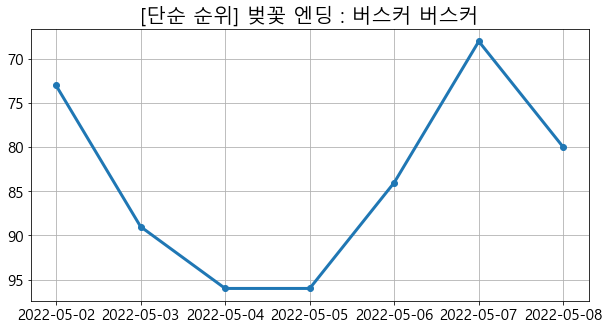

In [316]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

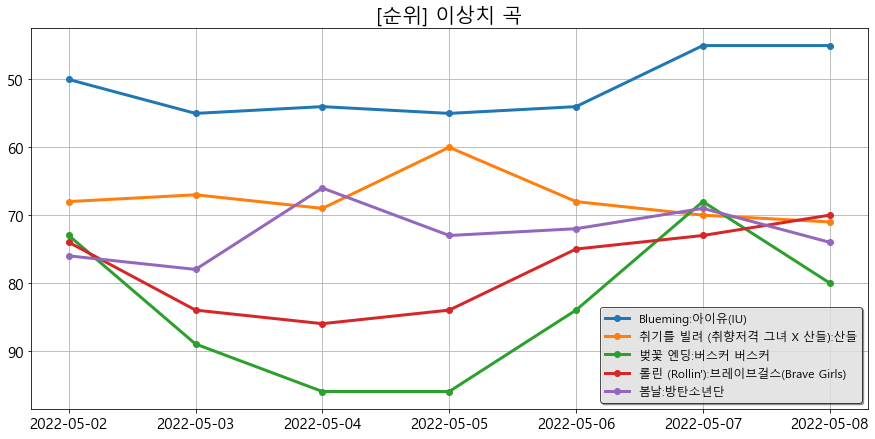

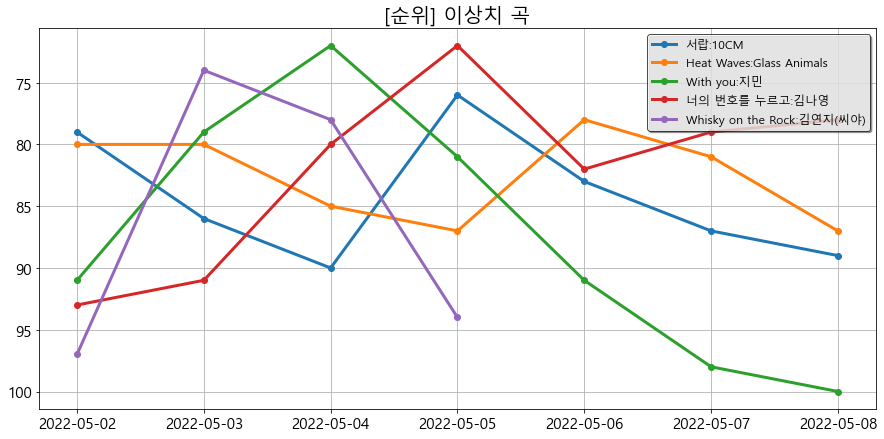

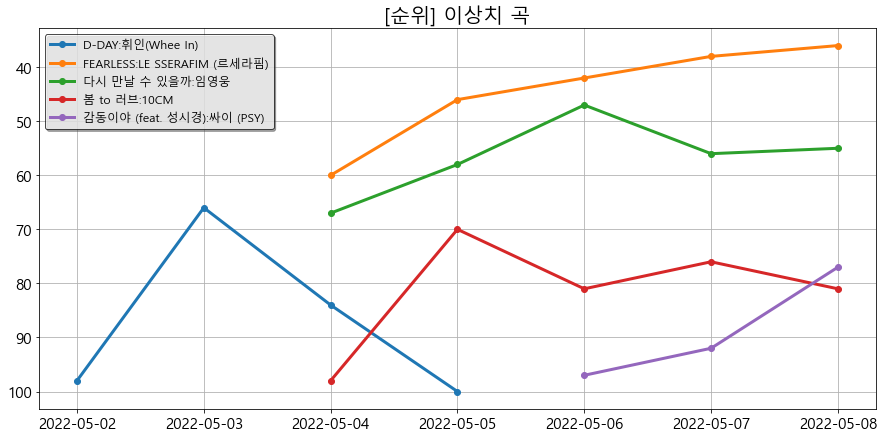

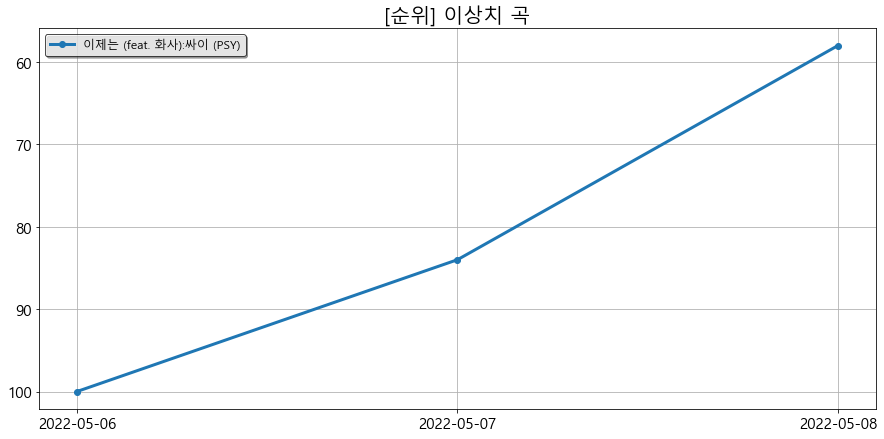

In [319]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

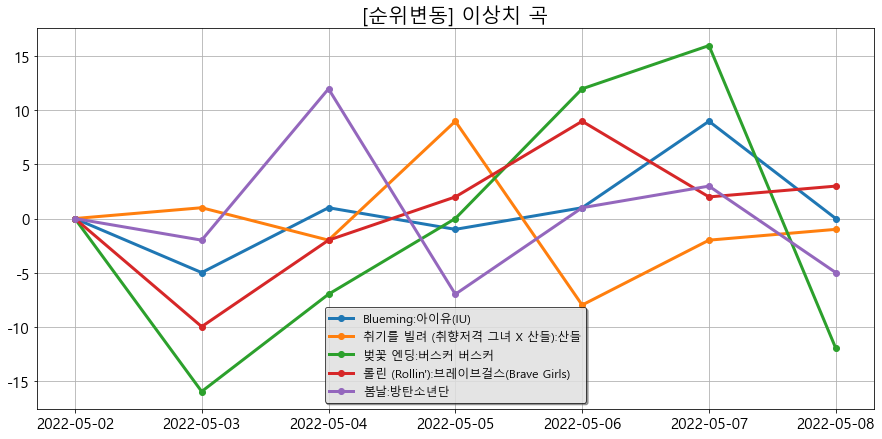

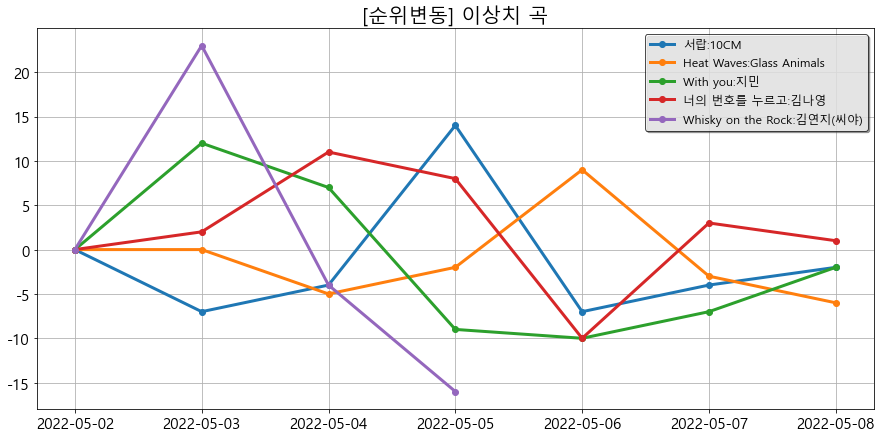

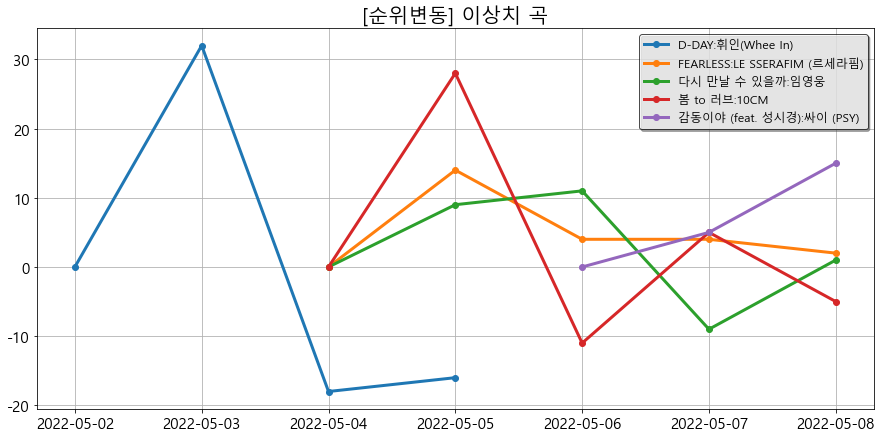

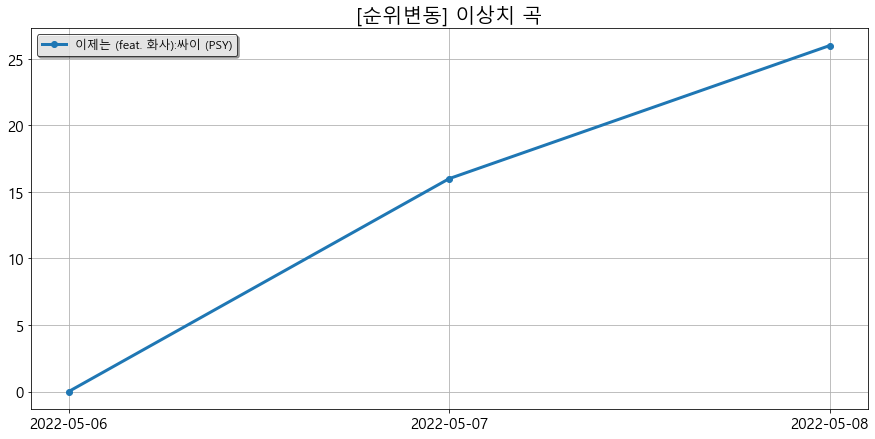

In [320]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [321]:
try:
    os.chdir(code_path)
except:
    pass

In [322]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [323]:
start_date, end_date

('2022-05-02', '2022-05-08')

In [324]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_16704/689724725.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_16704/689724725.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [325]:
driver.quit()

### 파일 이동

In [326]:
import glob
import shutil

In [327]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [328]:
os.listdir()

['(주)원트리즈뮤직_휴가계(양식).doc',
 'Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'D2Coding.ttf',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 '[vibe]20220509_132301_Blueming_아이유(IU).csv',
 '[vibe]20220509_132310_취기를_빌려_(취향저격_그녀_X_산들)_산들.csv',
 '[vibe]20220509_132318_벚꽃_엔딩_버스커 버스커.csv',
 "[vibe]20220509_132326_롤린_(Rollin')_브레이브걸스(Brave Girls).csv",
 '[vibe]20220509_132334_봄날_방탄소년단.csv',
 '[vibe]20220509_132342_서랍_10CM.csv',
 '[vibe]20220509_132350_Heat_Waves_Glass Animals.csv',
 '[vibe]20220509_132358_With_you_지민.csv',
 '[vibe]20220509_132406_너의_번호를_누르고_김나영.csv',
 '[vibe]20220509_132414_Whisky_on_the_Rock_김연지(씨야).csv',
 '[vibe]20220509_132421_D-DAY_휘인(Whee In).csv',
 '[vibe]20220509_132429_FEARLESS_LE SSERAFIM (르세라핌).csv',
 '[vibe]20220509_132437_다시_만날_수_있을까_임영웅.csv',
 '[vibe]20220509_132445_봄_to_러브_10CM.csv',
 '[vibe]20220509_132453_감동이야_(feat.

In [329]:
csv_file_list = glob.glob('*.csv')
csv_file_list

['[vibe]20220509_132301_Blueming_아이유(IU).csv',
 '[vibe]20220509_132310_취기를_빌려_(취향저격_그녀_X_산들)_산들.csv',
 '[vibe]20220509_132318_벚꽃_엔딩_버스커 버스커.csv',
 "[vibe]20220509_132326_롤린_(Rollin')_브레이브걸스(Brave Girls).csv",
 '[vibe]20220509_132334_봄날_방탄소년단.csv',
 '[vibe]20220509_132342_서랍_10CM.csv',
 '[vibe]20220509_132350_Heat_Waves_Glass Animals.csv',
 '[vibe]20220509_132358_With_you_지민.csv',
 '[vibe]20220509_132406_너의_번호를_누르고_김나영.csv',
 '[vibe]20220509_132414_Whisky_on_the_Rock_김연지(씨야).csv',
 '[vibe]20220509_132421_D-DAY_휘인(Whee In).csv',
 '[vibe]20220509_132429_FEARLESS_LE SSERAFIM (르세라핌).csv',
 '[vibe]20220509_132437_다시_만날_수_있을까_임영웅.csv',
 '[vibe]20220509_132445_봄_to_러브_10CM.csv',
 '[vibe]20220509_132453_감동이야_(feat._성시경)_싸이 (PSY).csv',
 '[vibe]20220509_132500_이제는_(feat._화사)_싸이 (PSY).csv']

In [330]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/vibe/'

In [331]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

# 코드 마지막